# 실험19. EDSR

In [1]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.edsr import edsr
from train import EdsrTrainer

In [2]:
# Number of residual blocks
depth = 9

# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [3]:
model = edsr(scale=scale, num_res_blocks=depth)
model.summary()

Model: "edsr"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
_______________________________________________________________________________________________

In [4]:
# Location of model weights (needed for demo)
weights_dir = f'weights/edsr-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [5]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [6]:
train_ds = div2k_train.dataset(batch_size=16, random_transform=True)
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

## Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-edsr-16-x4.tar.gz](https://drive.google.com/open?id=1xjyW_0dDS4jSTxKVZwtlkyfS4Oso-GUF) and extract the archive in the project's root directory. This will create a `weights/edsr-16-x4` directory containing the weights of the pre-trained model.

In [7]:
trainer = EdsrTrainer(model=edsr(scale=scale, num_res_blocks=depth), 
                      checkpoint_dir=f'.ckpt/edsr-{depth}-x{scale}')

In [8]:
# Train EDSR model for 300,000 steps and evaluate model 
# every 1000 steps on the first 20 images of the DIV2K validation set. 
# Save a checkpoint only if evaluation PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(80),
              steps=300000,
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 22.795, PSNR = 26.902954 (303.68s)
2000/300000: loss = 9.198, PSNR = 27.977345 (244.31s)
3000/300000: loss = 8.425, PSNR = 28.180750 (239.53s)
4000/300000: loss = 7.972, PSNR = 28.589375 (240.34s)
5000/300000: loss = 7.825, PSNR = 28.782383 (239.94s)
6000/300000: loss = 7.546, PSNR = 29.000666 (239.79s)
7000/300000: loss = 7.497, PSNR = 28.983829 (239.78s)
8000/300000: loss = 7.363, PSNR = 29.175140 (239.83s)
9000/300000: loss = 7.262, PSNR = 29.114172 (239.75s)
10000/300000: loss = 7.127, PSNR = 29.284729 (240.07s)
11000/300000: loss = 7.134, PSNR = 29.362991 (239.85s)
12000/300000: loss = 7.029, PSNR = 29.446253 (239.58s)
13000/300000: loss = 6.968, PSNR = 29.437725 (239.78s)
14000/300000: loss = 7.001, PSNR = 29.505112 (240.01s)
15000/300000: loss = 6.943, PSNR = 29.495401 (239.92s)
16000/300000: loss = 6.892, PSNR = 29.581066 (240.06s)
17000/300000: loss = 6.937, PSNR = 29.637253 (239.94s)
18000/300000: loss = 6.828, PSNR = 29.621683 (240.03s)
19000/300000: loss

150000/300000: loss = 6.276, PSNR = 30.240398 (239.50s)
151000/300000: loss = 6.281, PSNR = 30.254940 (239.84s)
152000/300000: loss = 6.329, PSNR = 30.272171 (239.10s)
153000/300000: loss = 6.271, PSNR = 30.226551 (238.86s)
154000/300000: loss = 6.296, PSNR = 30.261753 (238.80s)
155000/300000: loss = 6.318, PSNR = 30.262562 (238.71s)
156000/300000: loss = 6.256, PSNR = 30.262568 (238.65s)
157000/300000: loss = 6.287, PSNR = 30.218601 (238.68s)
158000/300000: loss = 6.264, PSNR = 30.249207 (238.82s)
159000/300000: loss = 6.266, PSNR = 30.223785 (238.79s)
160000/300000: loss = 6.267, PSNR = 30.247976 (238.83s)
161000/300000: loss = 6.277, PSNR = 30.257191 (238.65s)
162000/300000: loss = 6.292, PSNR = 30.252743 (238.73s)
163000/300000: loss = 6.312, PSNR = 30.269323 (238.62s)
164000/300000: loss = 6.290, PSNR = 30.286032 (238.67s)
165000/300000: loss = 6.284, PSNR = 30.276592 (238.95s)
166000/300000: loss = 6.215, PSNR = 30.250269 (238.90s)
167000/300000: loss = 6.261, PSNR = 30.269947 (2

297000/300000: loss = 6.195, PSNR = 30.378958 (240.59s)
298000/300000: loss = 6.172, PSNR = 30.374531 (240.66s)
299000/300000: loss = 6.169, PSNR = 30.359201 (240.66s)
300000/300000: loss = 6.185, PSNR = 30.388031 (240.65s)


In [9]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Model restored from checkpoint at step 285000.


In [10]:
# Evaluate model on full validation set
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 29.508345


In [11]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

## Demo

In [12]:
# model = edsr(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [13]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

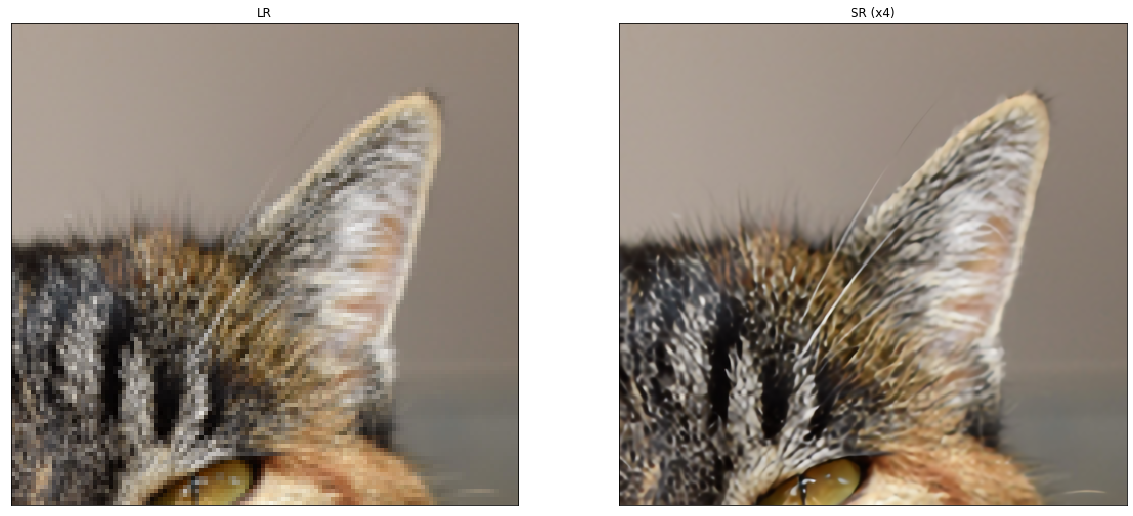

In [14]:
resolve_and_plot('demo/0869x4-crop.png')

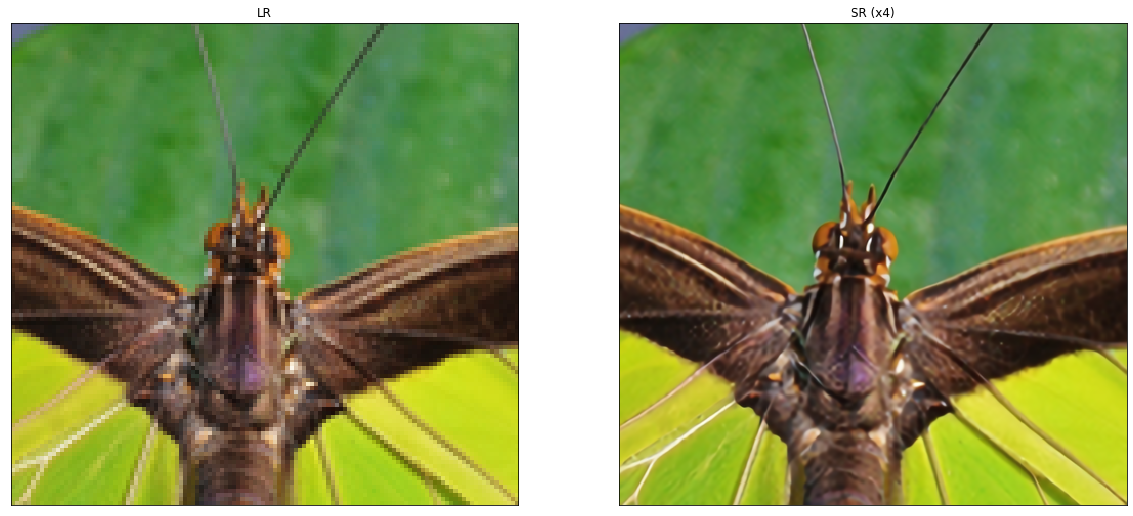

In [15]:
resolve_and_plot('demo/0829x4-crop.png')

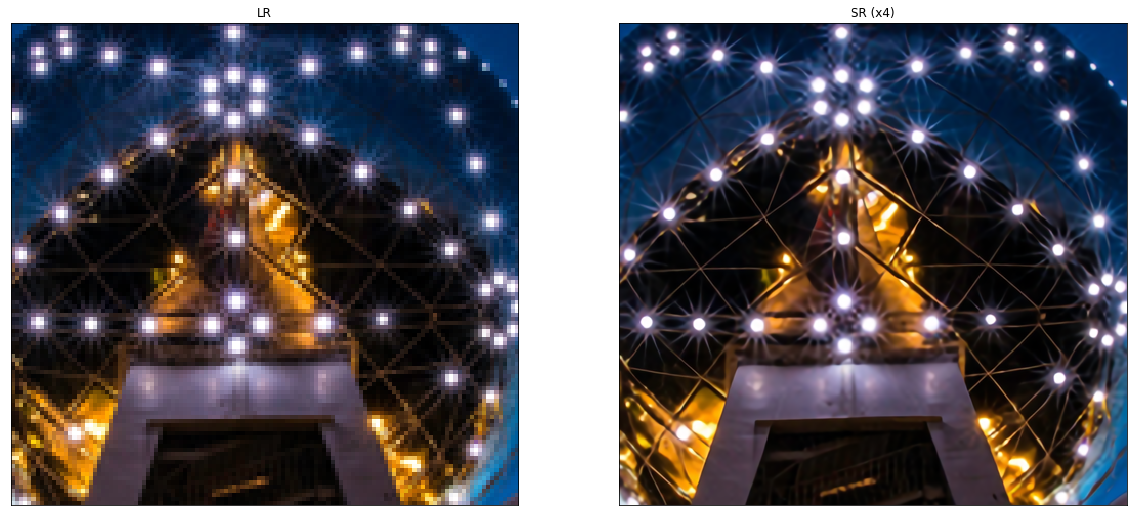

In [16]:
resolve_and_plot('demo/0851x4-crop.png')